## Machine Learning Analysis using Coffee Sales and Weather Data

In [52]:
import pandas as pd
from sqlalchemy import create_engine


In [53]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [54]:
load_dotenv()

DB_NAME = os.getenv("MYSQL_DATABASE")
DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = "127.0.0.1"
DB_PORT = 3306

In [55]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)


Read coffee sales data from MySQL running inside Docker

In [56]:
coffe_data = pd.read_sql(
    sql="SELECT * FROM coffee_sales",
    con=engine
)

In [57]:
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


 Read daily_weather data from MySQL running inside Docker

In [58]:
weather_data= pd.read_sql(
    sql="SELECT * FROM daily_weather",
    con=engine
)

In [59]:
weather_data.head()

,date,temperature_2m_mean
0,2023-01-01,8.78542
1,2023-01-02,7.98125
2,2023-01-03,9.69167
3,2023-01-04,13.08130
4,2023-01-05,9.91250


In [60]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 181 non-null    object 
 1   temperature_2m_mean  181 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [61]:
coffe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  object         
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  object         
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  object         
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  total_sales       149116 non-null  float64        
 12  month             149116 non-null  object         
 13  hour              149116 non-null  int64    

In [62]:
coffe_data.rename(columns={'transaction_date':'date'},inplace=True)
coffe_data.head()

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


In [63]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
coffe_data['date']=pd.to_datetime(coffe_data['date'])

In [64]:
daily_sales = coffe_data.groupby ( ["date", "store_id"] ).agg(
    { "total_sales": "sum"}).reset_index()
daily_sales

,date,store_id,total_sales
0,2023-01-01,3,868.40
1,2023-01-01,5,788.35
2,2023-01-01,8,851.45
3,2023-01-02,3,925.50
4,2023-01-02,5,649.05
...,...,...,...
538,2023-06-29,5,1299.45
539,2023-06-29,8,1298.55
540,2023-06-30,3,1807.65
541,2023-06-30,5,1768.74


 Merge datasets to create a unified dataset for machine learning analysis


In [65]:
data_ml=pd.merge(daily_sales,weather_data,on='date',how='left')

In [66]:
data_ml.head()

,date,store_id,total_sales,temperature_2m_mean
0,2023-01-01,3,868.40,8.78542
1,2023-01-01,5,788.35,8.78542
2,2023-01-01,8,851.45,8.78542
3,2023-01-02,3,925.50,7.98125
4,2023-01-02,5,649.05,7.98125


In [67]:
data_ml['year'] = data_ml['date'].dt.year
data_ml['month_num'] = data_ml['date'].dt.month
data_ml['day_num'] = data_ml['date'].dt.day

In [68]:
#data_ml.drop(columns=['month','weekday'],inplace=True)

In [69]:
data_ml

,date,store_id,total_sales,temperature_2m_mean,year,month_num,day_num
0,2023-01-01,3,868.40,8.78542,2023,1,1
1,2023-01-01,5,788.35,8.78542,2023,1,1
2,2023-01-01,8,851.45,8.78542,2023,1,1
3,2023-01-02,3,925.50,7.98125,2023,1,2
4,2023-01-02,5,649.05,7.98125,2023,1,2
...,...,...,...,...,...,...,...
538,2023-06-29,5,1299.45,22.35420,2023,6,29
539,2023-06-29,8,1298.55,22.35420,2023,6,29
540,2023-06-30,3,1807.65,23.03960,2023,6,30
541,2023-06-30,5,1768.74,23.03960,2023,6,30


In [70]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 543 non-null    datetime64[ns]
 1   store_id             543 non-null    object        
 2   total_sales          543 non-null    float64       
 3   temperature_2m_mean  543 non-null    float64       
 4   year                 543 non-null    int32         
 5   month_num            543 non-null    int32         
 6   day_num              543 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 23.5+ KB


In [71]:
df_model =data_ml[["year",
    
    "month_num",
    "day_num",
    "temperature_2m_mean",
    "store_id",
    "total_sales"
]]


In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [73]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 543 non-null    int32  
 1   month_num            543 non-null    int32  
 2   day_num              543 non-null    int32  
 3   temperature_2m_mean  543 non-null    float64
 4   store_id             543 non-null    object 
 5   total_sales          543 non-null    float64
dtypes: float64(2), int32(3), object(1)
memory usage: 19.2+ KB


In [74]:

from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
X = df_model.drop("total_sales", axis=1)
y = df_model["total_sales"]


In [76]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:",r_squared)
print('RMSE:',rmse)



MSE: 42369.749533091875
R2 Score: 0.7969523224209241
RMSE: 205.83913508633842


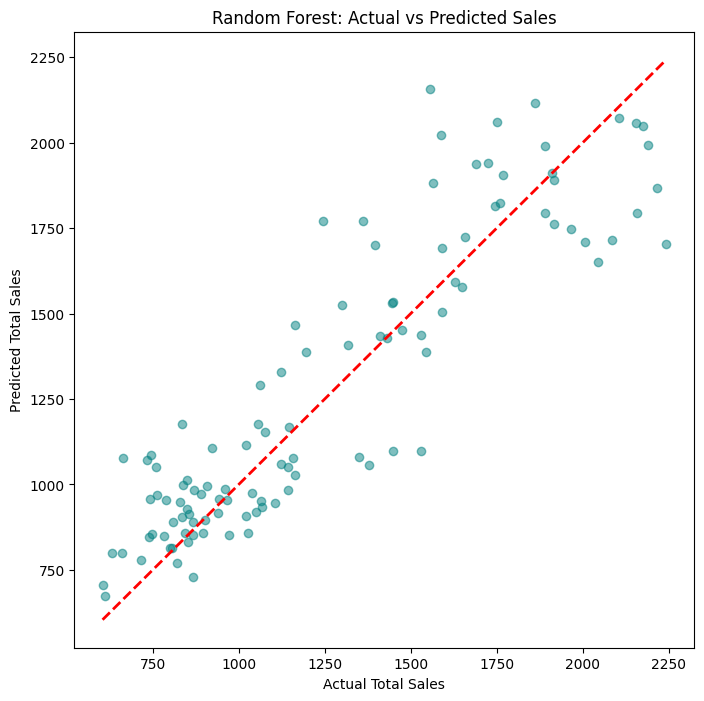

In [82]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal xətt
plt.xlabel("Actual Total Sales")
plt.ylabel("Predicted Total Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()